### Python for Finance

**Analyze Big Financial Data**

O'Reilly (2014)

Yves Hilpisch

**Buy the book** | O'Reilly | Amazon

**All book codes & IPYNBs** | http://oreilly.quant-platform.com

**The Python Quants GmbH** | http://tpq.io

**Contact us** | pff@tpq.io

### Introductory Examples

In [1]:
from pylab import plt
plt.style.use('seaborn')
import matplotlib as mpl
mpl.rcParams['font.family'] = 'serif'
import warnings; warnings.simplefilter('ignore')

### Implied Volatilities

In [2]:
V0 = 17.6639

In [3]:
r = 0.01

In [4]:
import pandas as pd
h5 = pd.HDFStore('C:/Users/502689880/Practice/Python for Finance/source/vstoxx_data_31032014.h5', 'r')
futures_data = h5['futures_data']  # VSTOXX futures data
options_data = h5['options_data']  # VSTOXX call option data
h5.close()

In [5]:
import datetime as dt

In [6]:
futures_data['DATE'] = futures_data['DATE'].apply(lambda x: dt.datetime.fromtimestamp(x / 1e9))

In [7]:
futures_data['MATURITY'] = futures_data['MATURITY'].apply(lambda x: dt.datetime.fromtimestamp(x / 1e9))

In [8]:
futures_data

,DATE,EXP_YEAR,EXP_MONTH,PRICE,MATURITY,TTM
496,2014-03-30 20:00:00,2014,4,17.85,2014-04-17 20:00:00,0.049
497,2014-03-30 20:00:00,2014,5,19.55,2014-05-15 20:00:00,0.126
498,2014-03-30 20:00:00,2014,6,19.95,2014-06-19 20:00:00,0.222
499,2014-03-30 20:00:00,2014,7,20.40,2014-07-17 20:00:00,0.299
500,2014-03-30 20:00:00,2014,8,20.70,2014-08-14 20:00:00,0.375
501,2014-03-30 20:00:00,2014,9,20.95,2014-09-18 20:00:00,0.471
502,2014-03-30 20:00:00,2014,10,21.05,2014-10-16 20:00:00,0.548
503,2014-03-30 20:00:00,2014,11,21.25,2014-11-20 19:00:00,0.644


In [9]:
options_data['DATE'] = options_data['DATE'].apply(lambda x: dt.datetime.fromtimestamp(x / 1e9))

In [10]:
options_data['MATURITY'] = options_data['MATURITY'].apply(lambda x: dt.datetime.fromtimestamp(x / 1e9))

In [11]:
options_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 395 entries, 46170 to 46564
Data columns (total 8 columns):
DATE         395 non-null datetime64[ns]
EXP_YEAR     395 non-null int64
EXP_MONTH    395 non-null int64
TYPE         395 non-null object
STRIKE       395 non-null float64
PRICE        395 non-null float64
MATURITY     395 non-null datetime64[ns]
TTM          395 non-null float64
dtypes: datetime64[ns](2), float64(3), int64(2), object(1)
memory usage: 27.8+ KB


In [12]:
options_data[['DATE', 'MATURITY', 'TTM', 'STRIKE', 'PRICE']].head()

,DATE,MATURITY,TTM,STRIKE,PRICE
46170,2014-03-30 20:00:00,2014-04-17 20:00:00,0.049,1.0,16.85
46171,2014-03-30 20:00:00,2014-04-17 20:00:00,0.049,2.0,15.85
46172,2014-03-30 20:00:00,2014-04-17 20:00:00,0.049,3.0,14.85
46173,2014-03-30 20:00:00,2014-04-17 20:00:00,0.049,4.0,13.85
46174,2014-03-30 20:00:00,2014-04-17 20:00:00,0.049,5.0,12.85


In [13]:
options_data['IMP_VOL'] = 0.0
  # new column for implied volatilities

In [14]:
from bsm_functions import *

In [15]:
tol = 0.5  # tolerance level for moneyness
for option in options_data.index:
    # iterating over all option quotes
    forward = futures_data[futures_data['MATURITY'] == \
                options_data.loc[option]['MATURITY']]['PRICE'].values[0]
      # picking the right futures value
    if (forward * (1 - tol) < options_data.loc[option]['STRIKE']
                             < forward * (1 + tol)):
        # only for options with moneyness within tolerance
        imp_vol = bsm_call_imp_vol(
                V0,  # VSTOXX value 
                options_data.loc[option]['STRIKE'],
                options_data.loc[option]['TTM'],
                r,   # short rate
                options_data.loc[option]['PRICE'],
                sigma_est=2.,  # estimate for implied volatility
                it=100)
        options_data.ix[option, 'IMP_VOL'] = imp_vol

In [16]:
futures_data['MATURITY']
  # select the column with name MATURITY

496   2014-04-17 20:00:00
497   2014-05-15 20:00:00
498   2014-06-19 20:00:00
499   2014-07-17 20:00:00
500   2014-08-14 20:00:00
501   2014-09-18 20:00:00
502   2014-10-16 20:00:00
503   2014-11-20 19:00:00
Name: MATURITY, dtype: datetime64[ns]

In [17]:
options_data.loc[46170]
  # select data row for index 46170

DATE         2014-03-30 20:00:00
EXP_YEAR                    2014
EXP_MONTH                      4
TYPE                           C
STRIKE                         1
PRICE                      16.85
MATURITY     2014-04-17 20:00:00
TTM                        0.049
IMP_VOL                        0
Name: 46170, dtype: object

In [18]:
options_data.loc[46170]['STRIKE']
  # select only the value in column STRIKE
  # for index 46170

1.0

In [19]:
plot_data = options_data[options_data['IMP_VOL'] > 0]

In [20]:
maturities = sorted(set(options_data['MATURITY']))
maturities

[Timestamp('2014-04-17 20:00:00'),
 Timestamp('2014-05-15 20:00:00'),
 Timestamp('2014-06-19 20:00:00'),
 Timestamp('2014-07-17 20:00:00'),
 Timestamp('2014-08-14 20:00:00'),
 Timestamp('2014-09-18 20:00:00'),
 Timestamp('2014-10-16 20:00:00'),
 Timestamp('2014-11-20 19:00:00')]

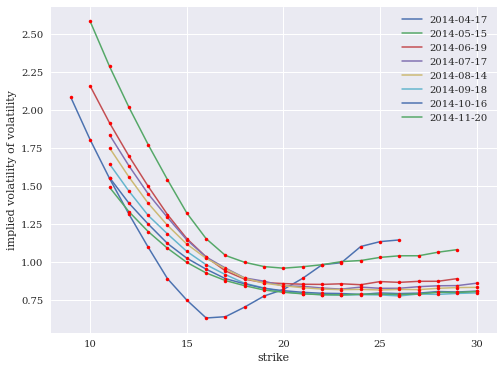

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(8, 6))
for maturity in maturities:
    data = plot_data[options_data.MATURITY == maturity]
      # select data for this maturity
    plt.plot(data['STRIKE'], data['IMP_VOL'],
             label=maturity.date(), lw=1.5)
    plt.plot(data['STRIKE'], data['IMP_VOL'], 'r.', label='')
plt.grid(True) 
plt.xlabel('strike')
plt.ylabel('implied volatility of volatility')
plt.legend()
plt.show()
# tag: vs_imp_vol
# title: Implied volatilities (of volatility) for European call options on the VSTOXX on 31. March 2014

In [22]:
keep = ['PRICE', 'IMP_VOL']
group_data = plot_data.groupby(['MATURITY', 'STRIKE'])[keep]
group_data

In [23]:
group_data = group_data.sum()
group_data.head()

PRICE   IMP_VOL
MATURITY            STRIKE                 
2014-04-17 20:00:00 9.0      8.85  2.083388
                    10.0     7.85  1.804193
                    11.0     6.85  1.550283
                    12.0     5.85  1.316103
                    13.0     4.85  1.097184

In [24]:
group_data.index.levels

FrozenList([[2014-04-17 20:00:00, 2014-05-15 20:00:00, 2014-06-19 20:00:00, 2014-07-17 20:00:00, 2014-08-14 20:00:00, 2014-09-18 20:00:00, 2014-10-16 20:00:00, 2014-11-20 19:00:00], [9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0]])

### Monte Carlo Simulation

In [25]:
from bsm_functions import bsm_call_value
S0 = 100.
K = 105.
T = 1.0
r = 0.05
sigma = 0.2
bsm_call_value(S0, K, T, r, sigma)

8.0213522351431763

### Pure Python

In [26]:
%run mcs_pure_python.py

European Option Value   7.999
Duration in Seconds    26.203


In [27]:
sum_val = 0.0
for path in S:
    # C-like iteration for comparison
    sum_val += max(path[-1] - K, 0)
C0 = exp(-r * T) * sum_val / I
round(C0, 3)

7.999

### Vectorization with NumPy

In [28]:
v = list(range(1, 6))
print(v)

[1, 2, 3, 4, 5]


In [29]:
2 * v

[1, 2, 3, 4, 5, 1, 2, 3, 4, 5]

In [30]:
import numpy as np
v = np.arange(1, 6)
v

array([1, 2, 3, 4, 5])

In [31]:
2 * v

array([ 2,  4,  6,  8, 10])

In [32]:
%run mcs_vector_numpy.py

European Option Value   8.037
Duration in Seconds     1.051


### Graphical Analysis

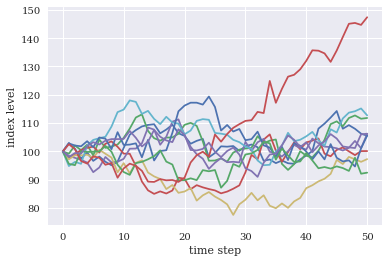

In [33]:
import matplotlib.pyplot as plt
plt.plot(S[:, :10])
plt.grid(True)
plt.xlabel('time step')
plt.ylabel('index level')
# tag: index_paths
# title: The first 10 simulated index level paths

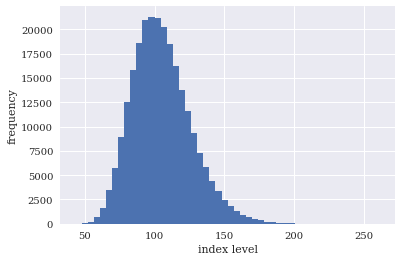

In [34]:
plt.hist(S[-1], bins=50)
plt.grid(True)
plt.xlabel('index level')
plt.ylabel('frequency')
# tag: index_histo
# title: Histogram of all simulated end of period index level values

(0, 50000)

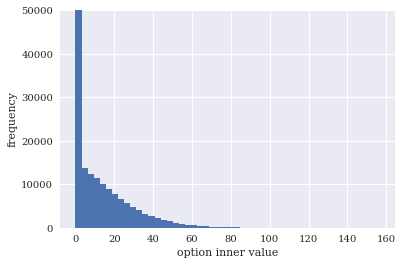

In [35]:
plt.hist(np.maximum(S[-1] - K, 0), bins=50)
plt.grid(True)
plt.xlabel('option inner value')
plt.ylabel('frequency')
plt.ylim(0, 50000)
# tag: option_iv_hist
# title: Histogram of all simulated end of period option inner values

In [36]:
sum(S[-1] < K)

133958

### Technical Analysis

In [37]:
import numpy as np
import pandas as pd

In [38]:
raw = pd.read_csv('C:/Users/502689880/Practice/Python for Finance/source/tr_eikon_eod_data.csv',
                   index_col=0, parse_dates=True)
AAPL = pd.DataFrame(raw['AAPL.O'])
AAPL.columns = ['Close']
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1972 entries, 2010-01-04 to 2017-10-31
Data columns (total 1 columns):
Close    1972 non-null float64
dtypes: float64(1)
memory usage: 30.8 KB


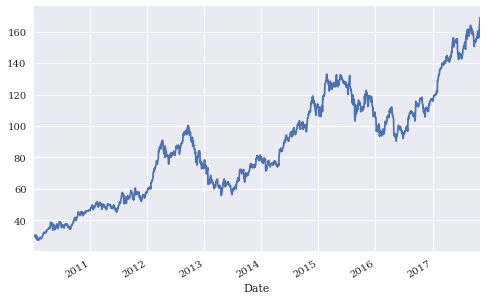

In [39]:
AAPL['Close'].plot(grid=True, figsize=(8, 5))
# tag: AAPL
# title: Historical levels of the S&P 500 index

In [40]:
AAPL['42d'] = np.round(AAPL['Close'].rolling(window=42).mean(), 2)
AAPL['252d'] = np.round(AAPL['Close'].rolling(window=252).mean(), 2)

In [41]:
AAPL[['Close', '42d', '252d']].tail()

,Close,42d,252d
Date,,,
2017-10-25,156.41,157.61,139.86
2017-10-26,157.41,157.51,140.03
2017-10-27,163.05,157.52,140.22
2017-10-30,166.72,157.60,140.43
2017-10-31,169.04,157.72,140.65


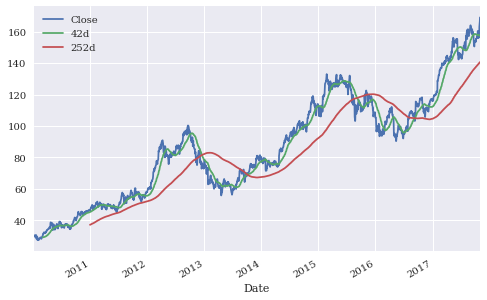

In [42]:
AAPL[['Close', '42d', '252d']].plot(grid=True, figsize=(8, 5))
# tag: AAPL_trend
# title: The Apple, Inc. stock price with 42d and 252d trend lines

In [43]:
AAPL['42-252'] = AAPL['42d'] - AAPL['252d']
AAPL['42-252'].tail()

Date
2017-10-25    17.75
2017-10-26    17.48
2017-10-27    17.30
2017-10-30    17.17
2017-10-31    17.07
Name: 42-252, dtype: float64

In [44]:
AAPL['42-252'].head()

Date
2010-01-04   NaN
2010-01-05   NaN
2010-01-06   NaN
2010-01-07   NaN
2010-01-08   NaN
Name: 42-252, dtype: float64

In [45]:
AAPL.dropna(inplace=True)

In [46]:
SD = 0.5
AAPL['Position'] = np.where(AAPL['42-252'] > SD, 1, 0)
AAPL['Position'] = np.where(AAPL['42-252'] < -SD, -1, AAPL['Position'])
AAPL['Position'].value_counts()

 1    1260
-1     445
 0      16
Name: Position, dtype: int64

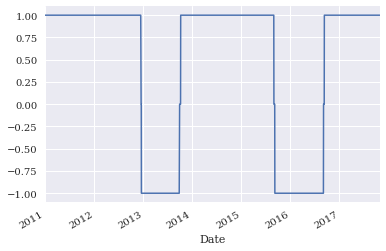

In [47]:
AAPL['Position'].plot(lw=1.5, grid=True)
plt.ylim([-1.1, 1.1]);
# tag: AAPL_signal
# title: Positions over time

In [48]:
AAPL['Market'] = np.log(AAPL['Close'] / AAPL['Close'].shift(1))

In [49]:
AAPL['Strategy'] = AAPL['Position'].shift(1) * AAPL['Market']

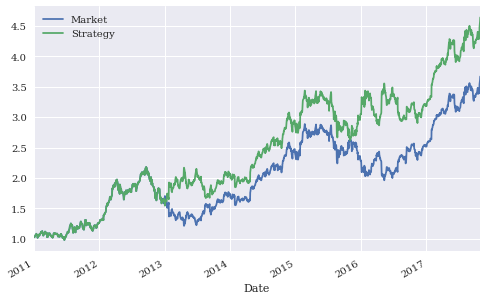

In [50]:
AAPL[['Market', 'Strategy']].cumsum().apply(np.exp).plot(grid=True,
                                                    figsize=(8, 5));
# tag: AAPL_wealth
# title: The Apple stock performance vs. investor's wealth

### Conclusions

### Further Reading

http://tpq.io | @dyjh | training@tpq.io

**Quant Platform** | http://quant-platform.com

**Python for Finance** | Python for Finance @ O'Reilly

**Derivatives Analytics with Python** | Derivatives Analytics @ Wiley Finance

**Listed Volatility and Variance Derivatives** | Listed VV Derivatives @ Wiley Finance

**Python Training** | Python for Finance University Certificate